In [1]:
import torchvision
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
plt.rcParams.update({'font.size': 15})

/home/mjy/anaconda3/envs/bilinear_network/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [26]:
transform = transforms.Compose([transforms.ToTensor()])
data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

In [3]:
train_images, train_labels = data_train.data, data_train.targets
train_images[np.where(train_images > 0)] = 1
data_train.data = train_images

test_images, test_labels = data_test.data, data_test.targets
test_images[np.where(test_images > 0)] = 1
data_test.data = test_images

In [27]:
selection_tr = torch.logical_or(data_train.targets == 0, data_train.targets == 7)
data_train.data = data_train.data[selection_tr]
data_train.targets = data_train.targets[selection_tr]

selection_test = torch.logical_or(data_test.targets == 0, data_test.targets == 7)
data_test.data = data_test.data[selection_test]
data_test.targets = data_test.targets[selection_test]

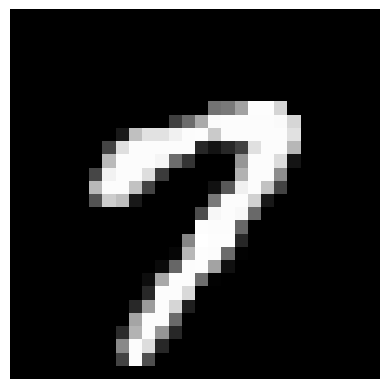

In [32]:
plt.figure()
plt.imshow(data_train.data[1], cmap='gray')
plt.axis('off')
plt.savefig('figure/mnist_7.png', bbox_inches='tight', dpi=800)

(-0.5, 27.5, 27.5, -0.5)

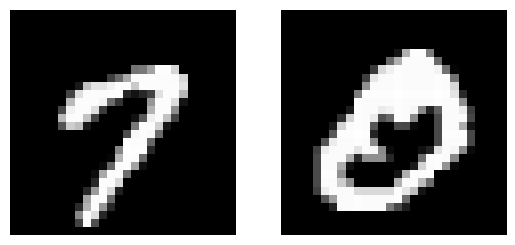

In [31]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(data_train.data[1], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(data_train.data[11], cmap='gray')
plt.axis('off')
# plt.savefig('figure/mnist_01.svg', dpi=600, bbox_inches='tight')
# plt.savefig('figure/mnist_01_2.png', bbox_inches='tight', dpi=800)

In [4]:
logistic = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', 
                        solver='saga',
                        max_iter=10000,
                        tol=1e-2,
                        C=50)

In [5]:
X_train = data_train.data.view(-1, 28*28).numpy()
Y_train = data_train.targets.numpy()
X_test = data_test.data.view(-1, 28*28).numpy()
Y_test = data_test.targets.numpy()

In [6]:
logistic.fit(X_train, Y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga', tol=0.01)

In [7]:
y = logistic.predict(X_test)
np.sum(y==Y_test)/len(Y_test)

0.9176

In [10]:
precision = logistic.score(X_test, Y_test)
print(precision)

0.9920477137176938


/tmp/ipykernel_2502023/56203353.py:2: MatplotlibDeprecationWarning: "linestyle" keyword argument will be ignored
  plt.eventplot(a, color='k', linestyle='dashdot')


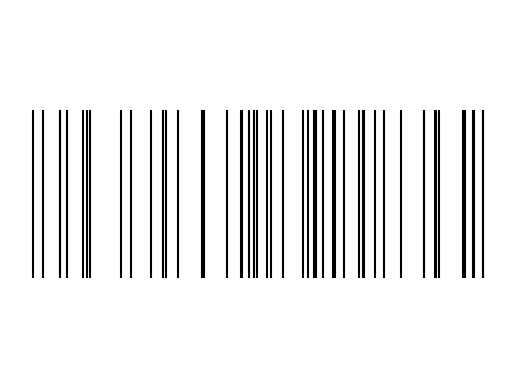

In [16]:
a = np.random.randint(0, 1000, [1,50])
plt.eventplot(a, color='k', linestyle='dashdot')
plt.axis('off')
plt.savefig('figure/spike_train2.png', bbox_inches='tight')

In [22]:
data_train.data[0].sum()

tensor(176)

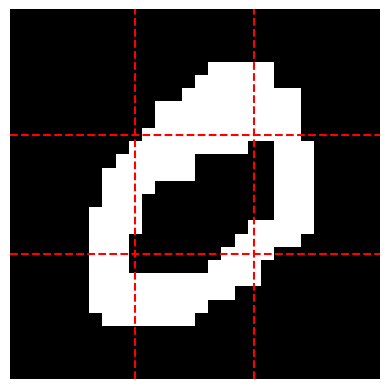

In [20]:
plt.figure()
plt.imshow(data_train.data[0], cmap='gray')
plt.axvline(x=9, color='r', linestyle='--')
plt.axvline(x=18, color='r', linestyle='--')
plt.axhline(y=9, color='r', linestyle='--')
plt.axhline(y=18, color='r', linestyle='--')
plt.axis('off')
plt.savefig('figure/mnist_segment.png', bbox_inches='tight')

In [28]:
plt.imshow(torch.flatten(data_train.data[0][0:9, 9:18]).reshape(1, 81), cmap='gray')
plt.axis('off')
plt.savefig('figure/mnist_flatten.png', bbox_inches='tight')

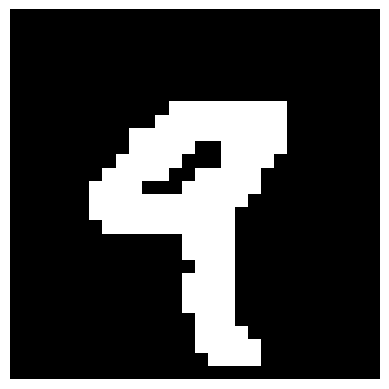

In [13]:
plt.figure()
plt.imshow(data_train.data[4], cmap='gray')
plt.axis('off')
plt.savefig('figure/mnist_9.png', bbox_inches='tight')

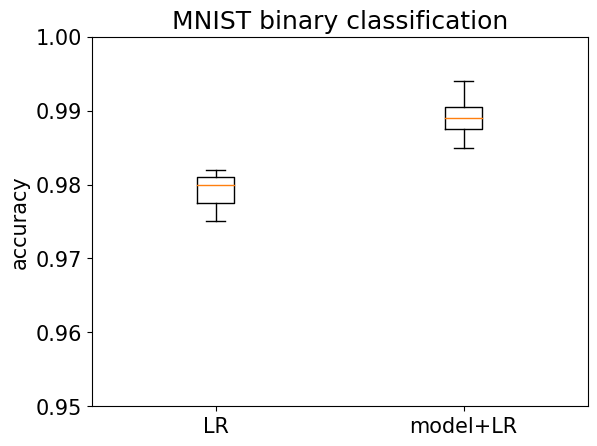

In [24]:
a = np.array([0.975, 0.98, 0.982])
b = np.array([0.982, 0.984, 0.985, 0.986, 0.987, 0.988, 0.991])
p = ['LR', 'model+LR']
plt.boxplot([a, b+0.003],showfliers=False,labels=p)
plt.ylim(0.95, 1)
plt.ylabel('accuracy')
plt.title('MNIST binary classification')
plt.savefig('figure/boxplot_MNIST_binary',bbox_inches='tight')

In [2]:
a = np.array([0.975, 0.98, 0.982])
b = np.array([0.982, 0.984, 0.985, 0.986, 0.987, 0.988, 0.991])

In [4]:
b.mean()

0.9861428571428572

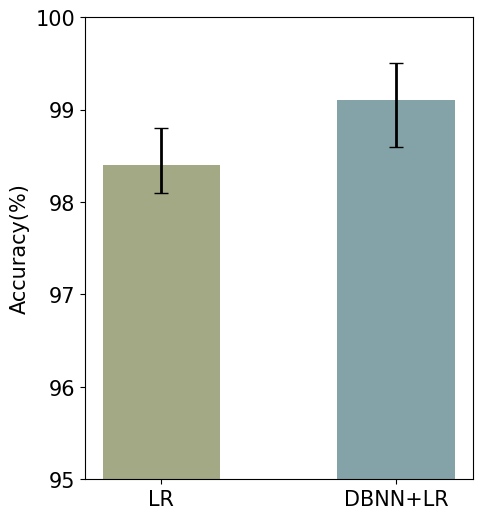

In [9]:
x=[1, 2]
#数据集
y=[98.4, 99.1]
#误差列表
y_err=[[0.3,0.5],[0.4, 0.4]]
plt.figure(figsize=(5,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.5, color=['#a3a984','#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['LR','DBNN+LR'])
plt.ylim(95, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/binary_MNIST_bar_plot.png', bbox_inches='tight', dpi=800)
plt.show()

In [18]:
a = np.array([0.906, 0.916, 0.92, 0.9, 0.911, 0.893, 0.899])
b = np.array([0.952, 0.954, 0.965, 0.956, 0.967, 0.958, 0.961])

In [20]:
b.mean()

0.959

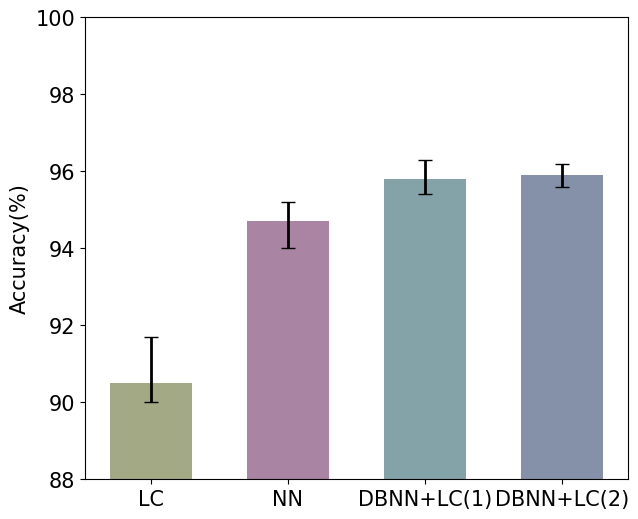

In [15]:
x=[1, 2, 3, 4]
#数据集
y=[90.5, 94.7, 95.8, 95.9]
#误差列表
y_err=[[0.5,0.7,0.4,0.3],[1.2, 0.5,0.5,0.3]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['LC','NN', 'DBNN+LC(1)', 'DBNN+LC(2)'])
plt.ylim(88, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/10_MNIST_2.png', bbox_inches='tight', dpi=800)
plt.show()

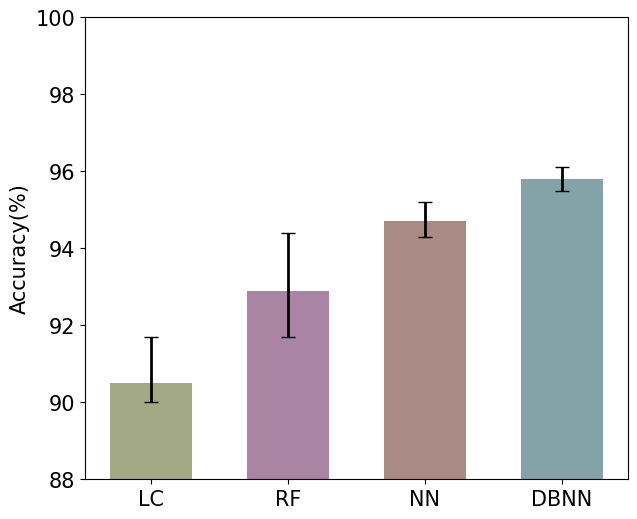

In [2]:
x=[1, 2, 3, 4]
#数据集
y=[90.5, 92.9, 94.7, 95.8]
#误差列表
y_err=[[0.5,1.2,0.4,0.3],[1.2, 1.5,0.5,0.3]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#a98a84', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['LC','RF', 'NN', 'DBNN'])
plt.ylim(88, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/10_MNIST_4.png', bbox_inches='tight', dpi=800)
plt.show()

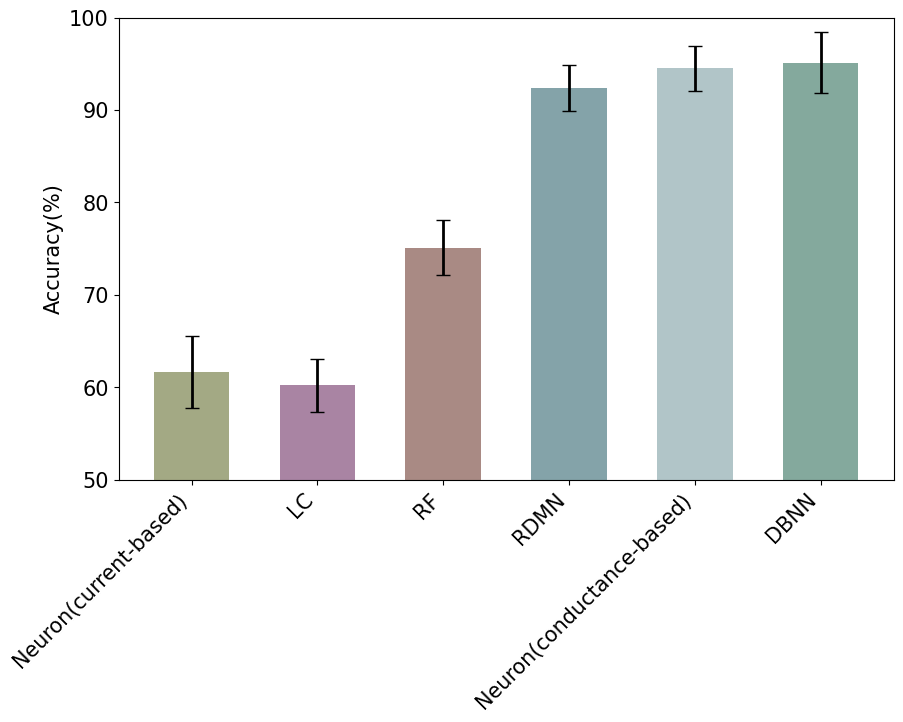

In [6]:
x=[1, 2, 3, 4, 5, 6]
#数据集
y=[61.6, 60.2, 75.1, 92.4, 94.5 ,95.1]
#误差列表
y_err=[[3.9,2.9, 3, 2.5, 2.4, 3.3],[3.9, 2.9, 3, 2.5, 2.4, 3.3]]
plt.figure(figsize=(10,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#a98a84', '#84A3A9', '#b1c5c8', '#84a99d'],yerr=y_err, error_kw=error_params,\
                    tick_label=['Neuron(current-based)','LC', 'RF', 'RDMN', 'Neuron(conductance-based)','DBNN'])
plt.xticks(rotation=45, ha='right')
plt.ylim(50, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gait_recogntion_current_based.png', bbox_inches='tight', dpi=800)
plt.show()

In [1]:
ve1 = [0.9967, 0.9959, 0.9951, 0.99505, 0.9949, 0.9949, 0.99445]
ve2 = [0.97, 0.97, 0.96, 0.955, 0.953, 0.951, 0.95]
ve3 = [0.991, 0.98, 0.953, 0.931, 0.90, 0.86, 0.8]

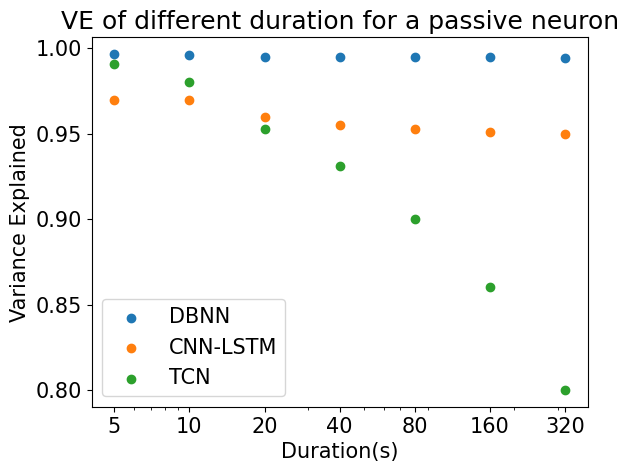

In [3]:
dur_list = [5, 10, 20, 40, 80, 160, 320]
plt.scatter(dur_list, ve1, label='DBNN')
plt.scatter(dur_list, ve2, label='CNN-LSTM')
plt.scatter(dur_list, ve3, label='TCN')
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
# plt.ylim(0.98, 1)
plt.legend()
plt.title('VE of different duration for a passive neuron')
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
plt.savefig('figure/different_duration_passive_compare.png', dpi=800, bbox_inches='tight')

In [9]:
ve1 = [0.951, 0.9259, 0.9, 0.875, 0.855, 0.814, 0.765]
ve2 = [0.9, 0.87, 0.857, 0.824, 0.777, 0.712, 0.654]
ve3 = [0.95, 0.912, 0.864, 0.805, 0.731, 0.641, 0.503]

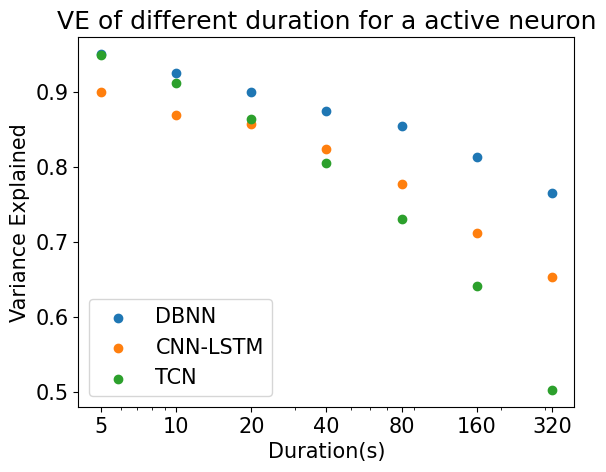

In [10]:
dur_list = [5, 10, 20, 40, 80, 160, 320]
plt.scatter(dur_list, ve1, label='DBNN')
plt.scatter(dur_list, ve2, label='CNN-LSTM')
plt.scatter(dur_list, ve3, label='TCN')
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
# plt.ylim(0.98, 1)
plt.legend()
plt.title('VE of different duration for a active neuron')
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
plt.savefig('figure/different_duration_active_compare.png', dpi=800, bbox_inches='tight')

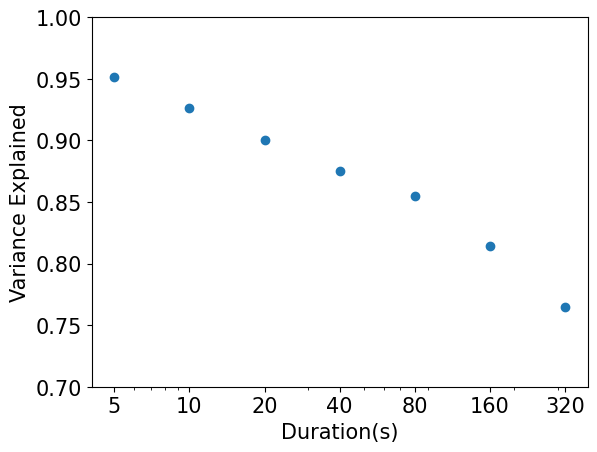

In [8]:
ve1 = [0.951, 0.9259, 0.9, 0.875, 0.855, 0.814, 0.765]
dur_list = [5, 10, 20, 40, 80, 160, 320]
plt.scatter(dur_list, ve1, label='DBNN')
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
plt.ylim(0.7, 1)
# plt.legend()
# plt.title('VE of different duration for a active neuron')
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
plt.savefig('figure/DBNN_different_duration_active.png', dpi=800, bbox_inches='tight')

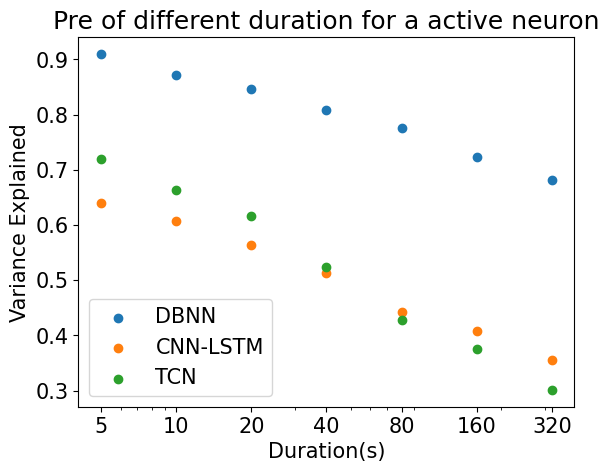

In [12]:
pre1 = [0.91, 0.872, 0.846, 0.809, 0.775, 0.723, 0.682]
pre2 = [0.64, 0.608, 0.564, 0.513, 0.442, 0.409, 0.355]
pre3 = [0.72, 0.663, 0.617, 0.524, 0.4287, 0.3762, 0.3014]
dur_list = [5, 10, 20, 40, 80, 160, 320]
plt.scatter(dur_list, pre1, label='DBNN')
plt.scatter(dur_list, pre2, label='CNN-LSTM')
plt.scatter(dur_list, pre3, label='TCN')
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
# plt.ylim(0.98, 1)
plt.legend()
plt.title('Pre of different duration for a active neuron')
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
plt.savefig('figure/different_duration_active_compare_pre.png', dpi=800, bbox_inches='tight')

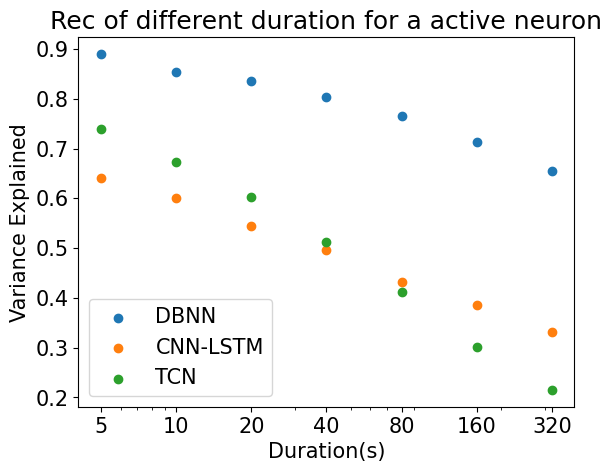

In [11]:
pre1 = [0.89, 0.853, 0.835, 0.803, 0.765, 0.713, 0.655]
pre2 = [0.64, 0.601, 0.544, 0.496, 0.432, 0.385, 0.331]
pre3 = [0.74, 0.673, 0.602, 0.512, 0.411, 0.302, 0.215]
dur_list = [5, 10, 20, 40, 80, 160, 320]
plt.scatter(dur_list, pre1, label='DBNN')
plt.scatter(dur_list, pre2, label='CNN-LSTM')
plt.scatter(dur_list, pre3, label='TCN')
# set the x ticks as dur_list
xlabel_ticks = ['5', '10', '20', '40', '80', '160', '320']
plt.xscale('log')
plt.xticks(dur_list, xlabel_ticks)
# plt.ylim(0.98, 1)
plt.legend()
plt.title('Rec of different duration for a active neuron')
plt.ylabel('Variance Explained')
plt.xlabel('Duration(s)')
plt.savefig('figure/different_duration_active_compare_rec.png', dpi=800, bbox_inches='tight')

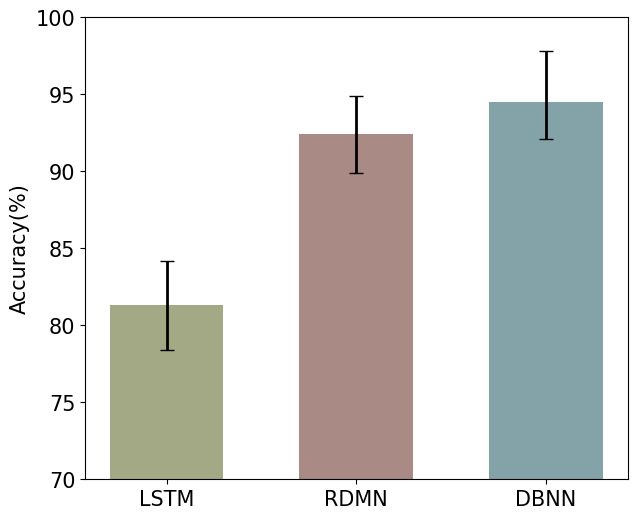

In [5]:
x=[1, 2, 3]
#数据集
y=[81.3, 92.4, 94.5]
#误差列表
y_err=[[2.9,2.5, 2.4],[2.9,2.5,3.3]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a98a84', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['LSTM','RDMN', 'DBNN'])
plt.ylim(70, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gait_recogntion——6.png', bbox_inches='tight', dpi=800)
plt.show()

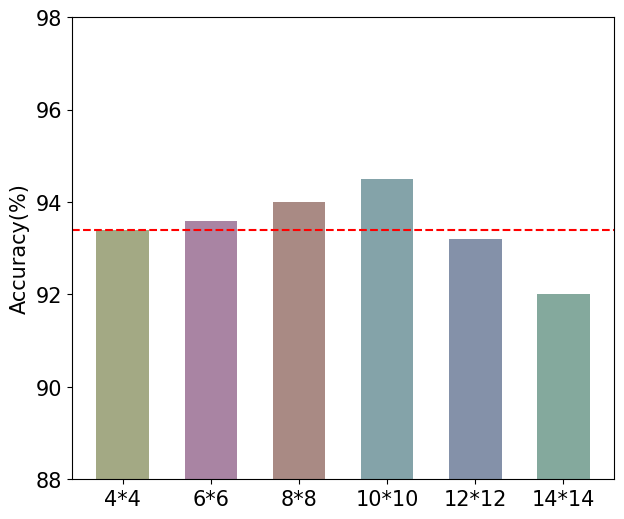

In [2]:
x=[1, 2, 3, 4, 5, 6]
#数据集
y=[93.4, 93.6, 94, 94.5, 93.2, 92]
#误差列表
y_err=[[3.1,2.9,3,3, 3.5, 2.7],[3, 2.9, 3.2, 3.3, 3.5, 2.7]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#a98a84', '#84A3A9', '#8491a9', '#84a99d'], error_kw=error_params,\
                    tick_label=['4*4','6*6', '8*8', '10*10', '12*12', '14*14'])
plt.ylim(88, 98)
plt.axhline(y=93.4, c='r', ls='--')
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gait_recogntion——4_recep.png', bbox_inches='tight', dpi=800)
plt.show()

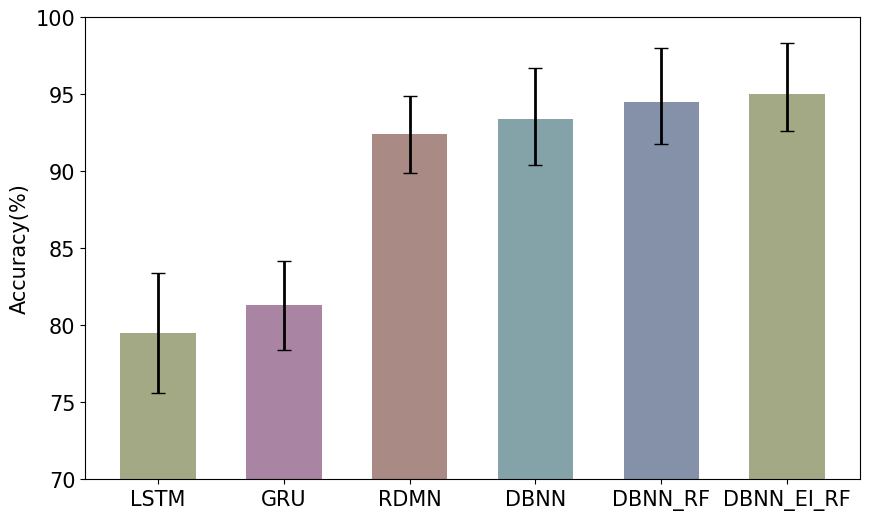

In [9]:
x=[1, 2, 3, 4, 5, 6]
#数据集
y=[79.5, 81.3, 92.4, 93.4, 94.5, 95]
#误差列表
y_err=[[3.9,2.9,2.5,3, 2.7, 2.4],[3.9, 2.9,2.5,3.3, 3.5, 3.3]]
plt.figure(figsize=(10,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#a98a84', '#84A3A9', '#8491a9'], yerr=y_err, error_kw=error_params,\
                    tick_label=['LSTM','GRU', 'RDMN', 'DBNN', 'DBNN_RF', 'DBNN_EI_RF'])
plt.ylim(70, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gait_recogntion——5.png', bbox_inches='tight', dpi=800)
plt.show()

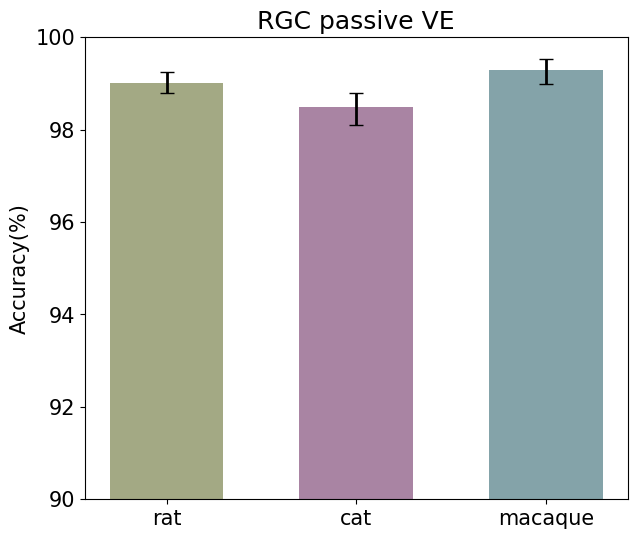

In [6]:
x=[1, 2, 3]
#数据集
y=[99, 98.5, 99.3]
#误差列表
y_err=[[0.2,0.4,0.31],[0.24, 0.3,0.22]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['rat','cat', 'macaque'])
plt.ylim(90, 100)
plt.ylabel('Accuracy(%)')
plt.title('RGC passive VE')
plt.savefig('figure/RGC_pas_VE.png', bbox_inches='tight', dpi=800)
plt.show()

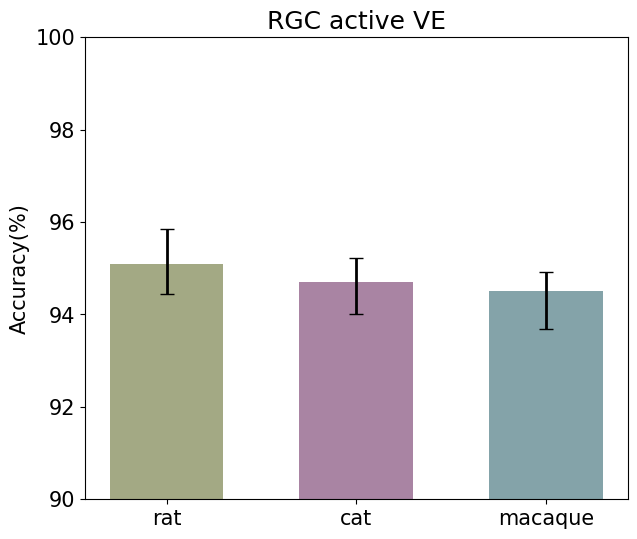

In [7]:
x=[1, 2, 3]
#数据集
y=[95.1, 94.7, 94.5]
#误差列表
y_err=[[0.65,0.68,0.81],[0.74, 0.53,0.42]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['rat','cat', 'macaque'])
plt.ylim(90, 100)
plt.ylabel('Accuracy(%)')
plt.title('RGC active VE')
plt.savefig('figure/RGC_act_VE.png', bbox_inches='tight', dpi=800)
plt.show()

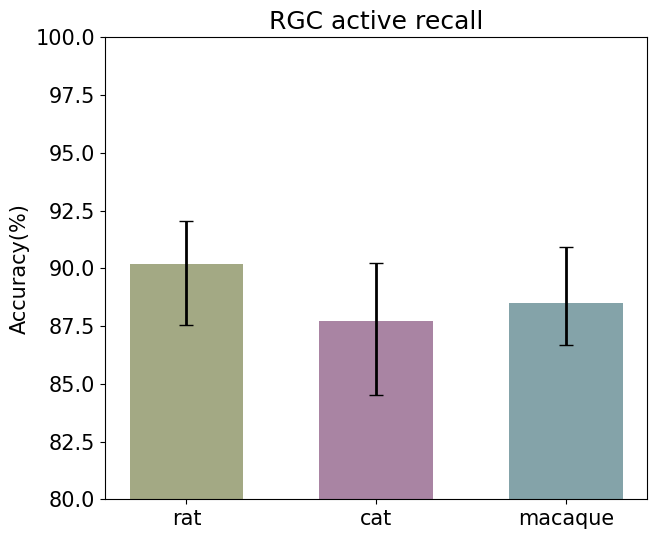

In [10]:
x=[1, 2, 3]
#数据集
y=[90.2, 87.7, 88.5]
#误差列表
y_err=[[2.65,3.18,1.81],[1.84, 2.53,2.42]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['rat','cat', 'macaque'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('RGC active recall')
plt.savefig('figure/RGC_act_rec.png', bbox_inches='tight', dpi=800)
plt.show()

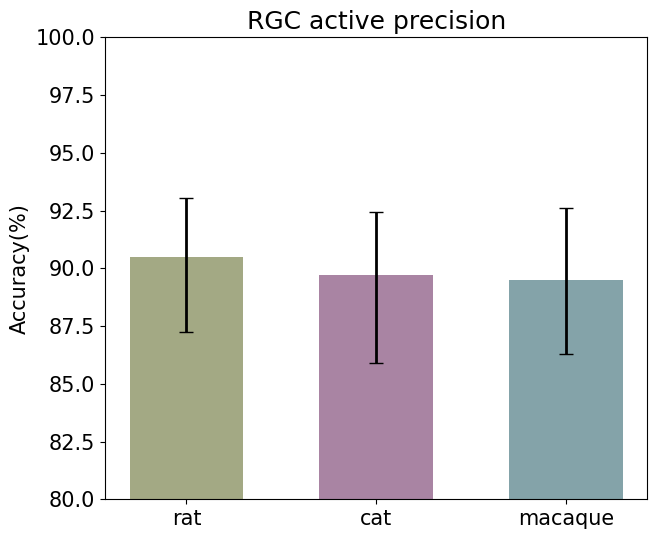

In [9]:
x=[1, 2, 3]
#数据集
y=[90.5, 89.7, 89.5]
#误差列表
y_err=[[3.25,3.78,3.21],[2.54, 2.73,3.12]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['rat','cat', 'macaque'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('RGC active precision')
plt.savefig('figure/RGC_act_pre.png', bbox_inches='tight', dpi=800)
plt.show()

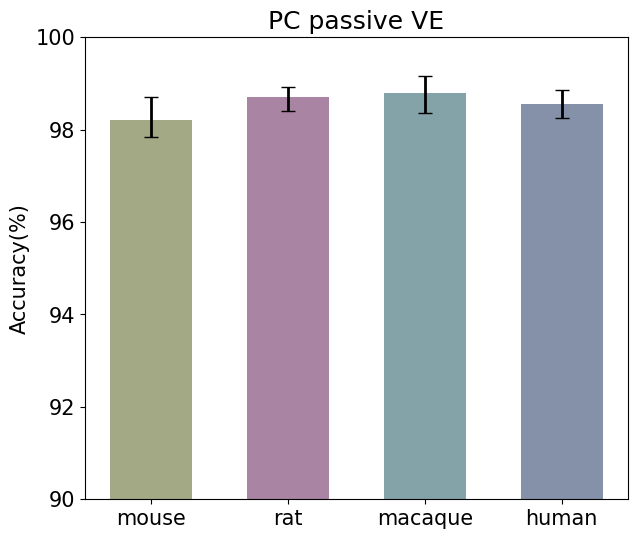

In [25]:
x=[1, 2, 3, 4]
#数据集
y=[98.2, 98.7, 98.8, 98.56]
#误差列表
y_err=[[0.35,0.3,0.43,0.3],[0.5, 0.23,0.36,0.3]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['mouse','rat', 'macaque', 'human'])
plt.ylim(90, 100)
plt.ylabel('Accuracy(%)')
plt.title('PC passive VE')
plt.savefig('figure/PC_pas_VE.png', bbox_inches='tight', dpi=800)
plt.show()

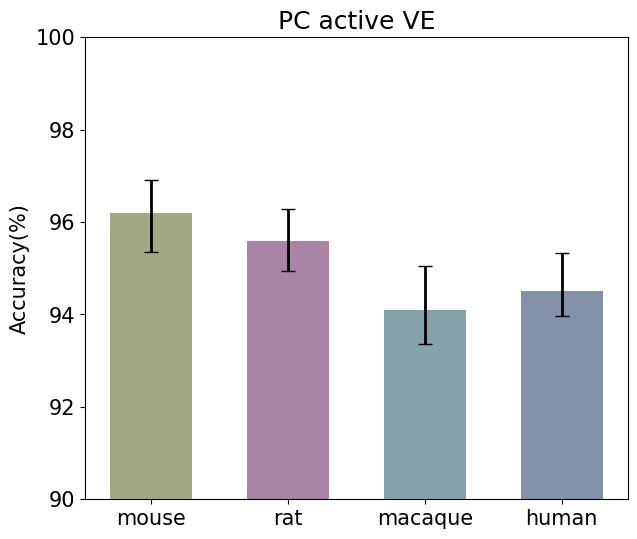

In [26]:
x=[1, 2, 3, 4]
#数据集
y=[96.2, 95.6, 94.1, 94.5]
#误差列表
y_err=[[0.85,0.65,0.73,0.53],[0.71, 0.69,0.96,0.83]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['mouse','rat', 'macaque', 'human'])
plt.ylim(90, 100)
plt.ylabel('Accuracy(%)')
plt.title('PC active VE')
plt.savefig('figure/PC_act_VE.png', bbox_inches='tight', dpi=800)
plt.show()

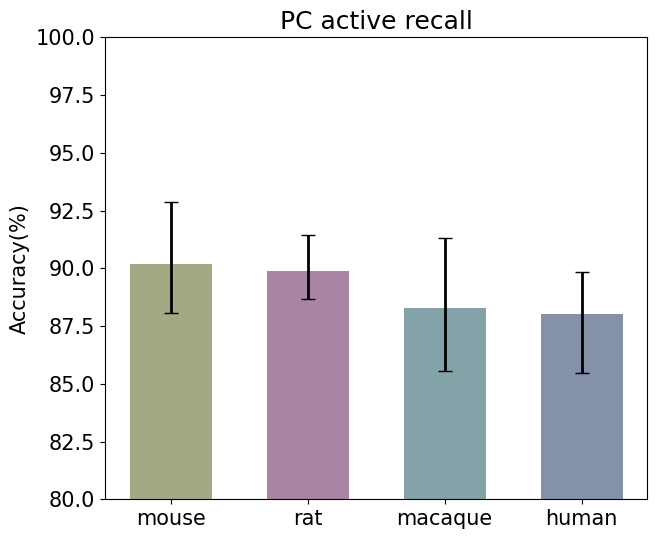

In [27]:
x=[1, 2, 3, 4]
#数据集
y=[90.2, 89.9, 88.3, 88]
#误差列表
y_err=[[2.13,1.23,2.73,2.53],[2.69, 1.56,3.01,1.83]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['mouse','rat', 'macaque', 'human'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('PC active recall')
plt.savefig('figure/PC_act_rec.png', bbox_inches='tight', dpi=800)
plt.show()

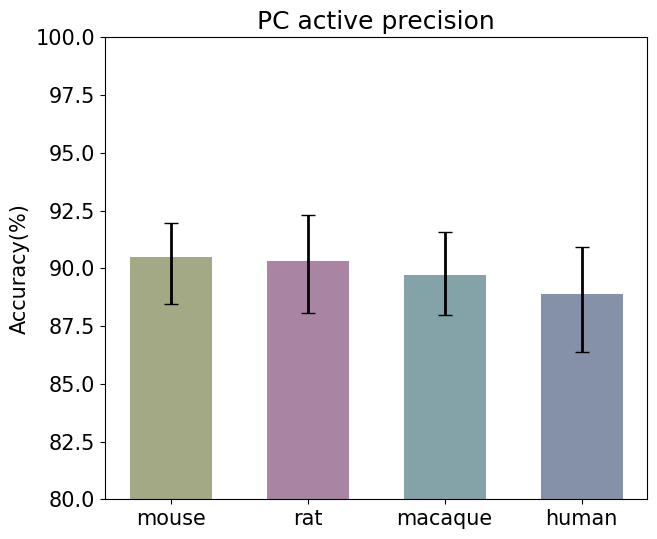

In [28]:
x=[1, 2, 3, 4]
#数据集
y=[90.5, 90.3, 89.7, 88.9]
#误差列表
y_err=[[2.03,2.23,1.73,2.51],[1.46, 2.01,1.89,2.01]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['mouse','rat', 'macaque', 'human'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('PC active precision')
plt.savefig('figure/PC_act_pre.png', bbox_inches='tight', dpi=800)
plt.show()

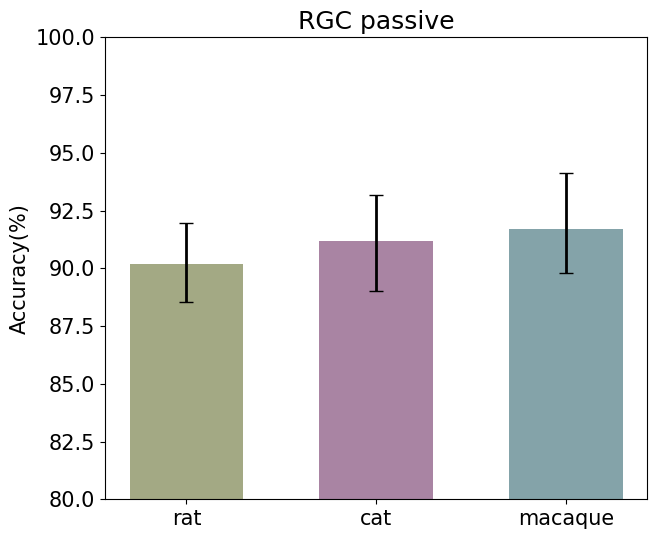

In [30]:
x=[1, 2, 3]
#数据集
y=[90.2, 91.2, 91.7]
#误差列表
y_err=[[1.65,2.18,1.91],[1.74, 1.96, 2.42]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['rat','cat', 'macaque'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('RGC passive')
plt.savefig('figure/RGC_pas_acc.png', bbox_inches='tight', dpi=800)
plt.show()

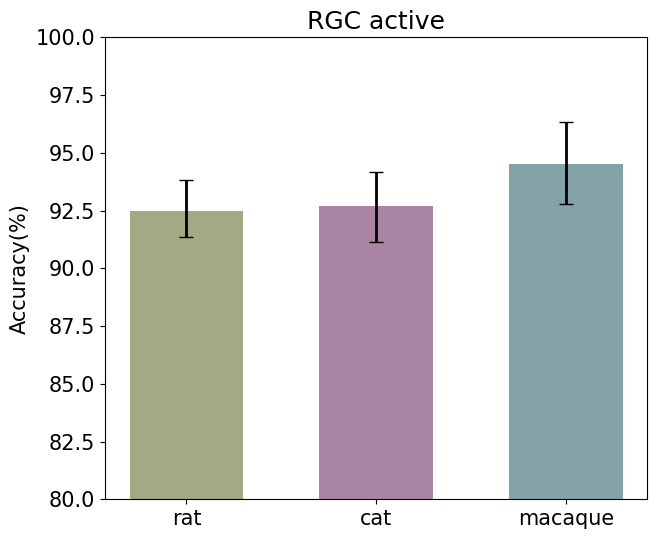

In [29]:
x=[1, 2, 3]
#数据集
y=[92.5, 92.7, 94.5]
#误差列表
y_err=[[1.15,1.58,1.71],[1.34, 1.46, 1.82]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['rat','cat', 'macaque'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('RGC active')
plt.savefig('figure/RGC_act_acc.png', bbox_inches='tight', dpi=800)
plt.show()

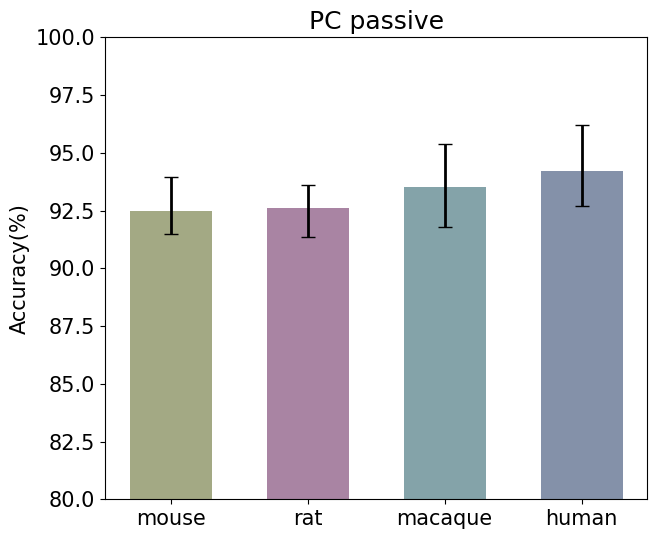

In [33]:
x=[1, 2, 3, 4]
#数据集
y=[92.5, 92.6, 93.5, 94.2]
#误差列表
y_err=[[1.03,1.23,1.73,1.51],[1.46, 1.01,1.89,2.01]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['mouse','rat', 'macaque', 'human'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('PC passive')
plt.savefig('figure/PC_pas_acc.png', bbox_inches='tight', dpi=800)
plt.show()

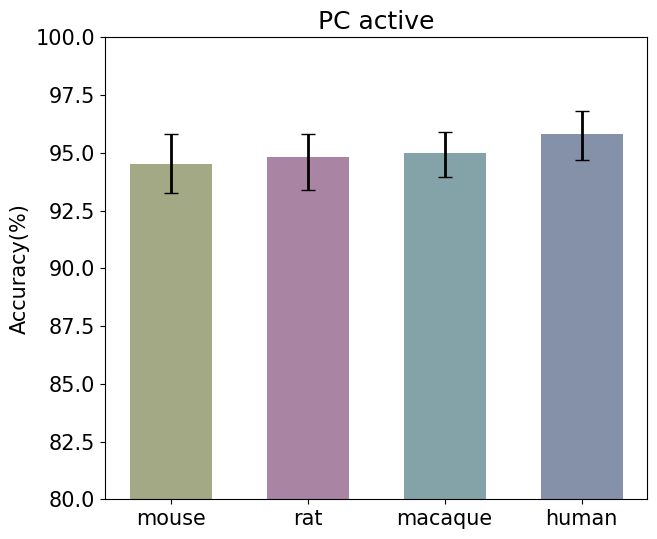

In [34]:
x=[1, 2, 3, 4]
#数据集
y=[94.5, 94.8, 95, 95.8]
#误差列表
y_err=[[1.23,1.41,1.03,1.1],[1.31, 1.01,0.89,1.01]]
plt.figure(figsize=(7,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.6, color=['#a3a984','#a984a3', '#84A3A9', '#8491a9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['mouse','rat', 'macaque', 'human'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.title('PC active')
plt.savefig('figure/PC_act_acc.png', bbox_inches='tight', dpi=800)
plt.show()

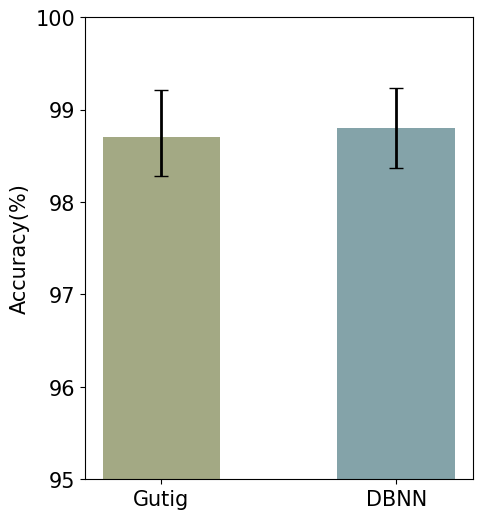

In [5]:
x=[1, 2]
#数据集
y=[98.7, 98.8]
#误差列表
y_err=[[0.42,0.43],[0.51, 0.43]]
plt.figure(figsize=(5,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.5, color=['#a3a984','#84A3A9'],yerr=y_err, error_kw=error_params,\
                    tick_label=['Gutig','DBNN'])
plt.ylim(95, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gutig_compare_original.png', bbox_inches='tight', dpi=800)
plt.show()

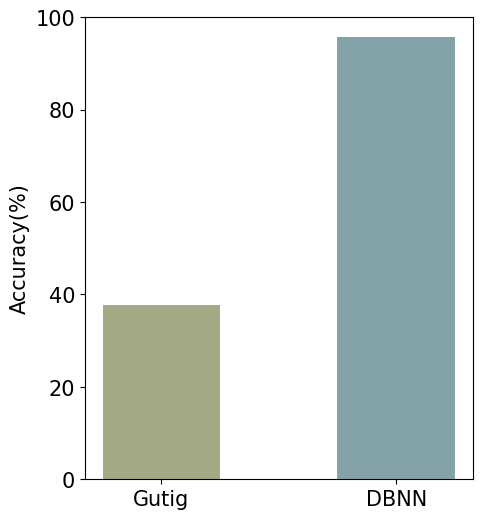

In [4]:
x=[1, 2]
#数据集
y=[37.7, 95.8]
#误差列表
# y_err=[[0.42,0.43],[0.51, 0.43]]
plt.figure(figsize=(5,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.5, color=['#a3a984','#84A3A9'], error_kw=error_params,\
                    tick_label=['Gutig','DBNN'])
plt.ylim(0, 100)
plt.ylabel('Accuracy(%)')
# plt.savefig('figure/gutig_compare_original_2.png', bbox_inches='tight', dpi=800)
plt.show()

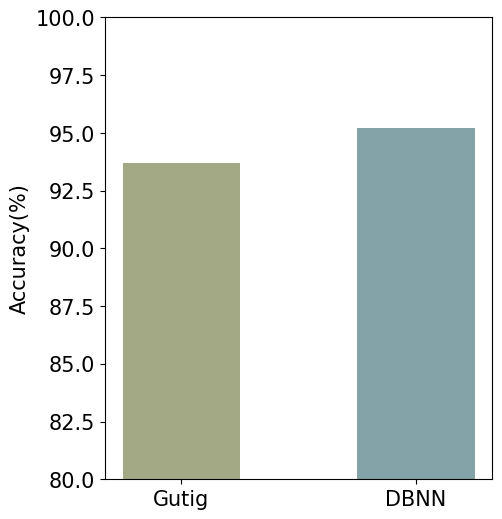

In [6]:
x=[1, 2]
#数据集
y=[93.7, 95.2]
#误差列表
# y_err=[[0.42,0.43],[0.51, 0.43]]
plt.figure(figsize=(5,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.5, color=['#a3a984','#84A3A9'], error_kw=error_params,\
                    tick_label=['Gutig','DBNN'])
plt.ylim(80, 100)
plt.ylabel('Accuracy(%)')
plt.savefig('figure/gutig_compare_original_3.png', bbox_inches='tight', dpi=800)
plt.show()

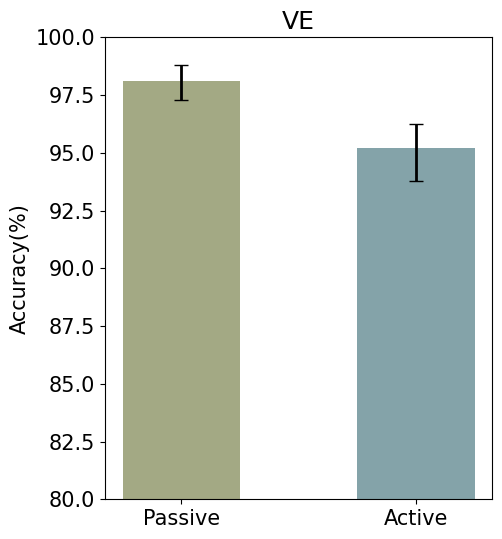

In [10]:
x=[1, 2]
#数据集
y=[98.1, 95.2]
#误差列表
y_err=[[0.82,1.43],[0.71, 1.03]]
plt.figure(figsize=(5,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.5, color=['#a3a984','#84A3A9'], yerr=y_err, error_kw=error_params,\
                    tick_label=['Passive','Active'])
plt.ylim(80, 100)
plt.title('VE')
plt.ylabel('Accuracy(%)')
plt.savefig('figure/motor_neuron_ve.png', bbox_inches='tight', dpi=800)
plt.show()

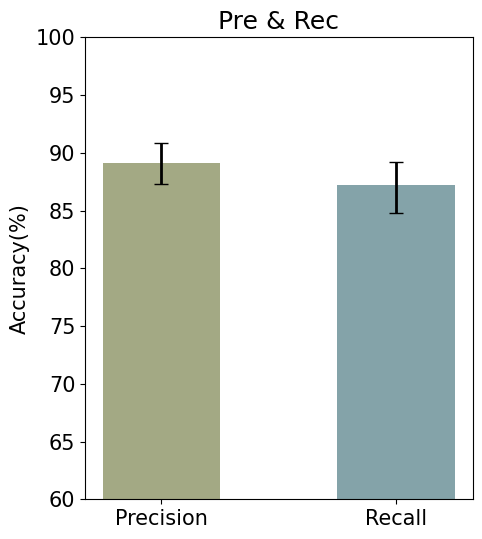

In [12]:
x=[1, 2]
#数据集
y=[89.1, 87.2]
#误差列表
y_err=[[1.82,2.43],[1.71, 2.03]]
plt.figure(figsize=(5,6))
error_params=dict(elinewidth=2,ecolor='black',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,width=0.5, color=['#a3a984','#84A3A9'], yerr=y_err, error_kw=error_params,\
                    tick_label=['Precision','Recall'])
plt.ylim(60, 100)
plt.title('Pre & Rec')
plt.ylabel('Accuracy(%)')
plt.savefig('figure/motor_neuron_pre_rec.png', bbox_inches='tight', dpi=800)
plt.show()